<a href="https://colab.research.google.com/github/swetha-guggal/diabetes-prediction/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from google.colab import files
import pickle

data = pd.read_csv("/content/diabetes.csv")
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

 **Data Collection and Exploration:

Obtain the dataset with the specified features, ensuring that it's labeled with diabetes status (positive or negative).
Explore the dataset to understand its structure, check for missing values, and gain insights into the data distribution.
**

In [4]:
data_copy = data.copy(deep=True)


   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0

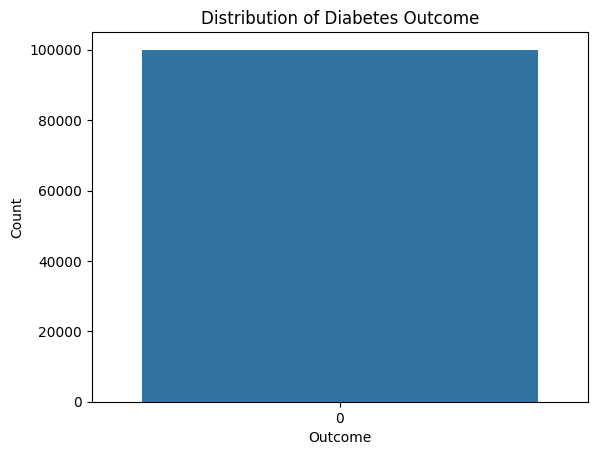

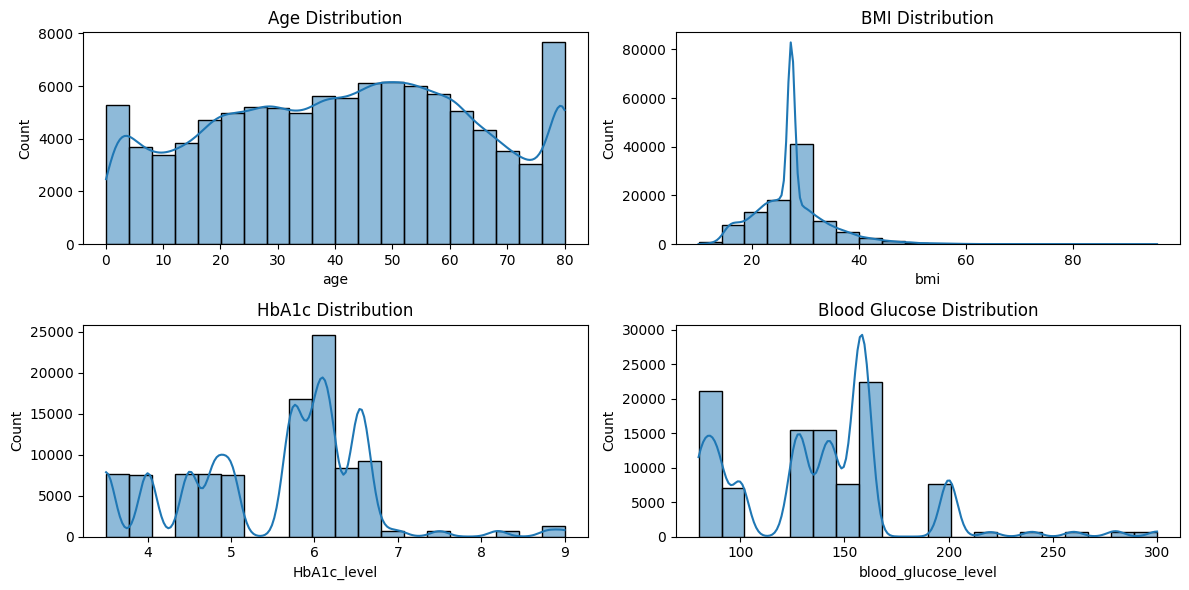

<ipython-input-5-a96e2230d038>:39: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


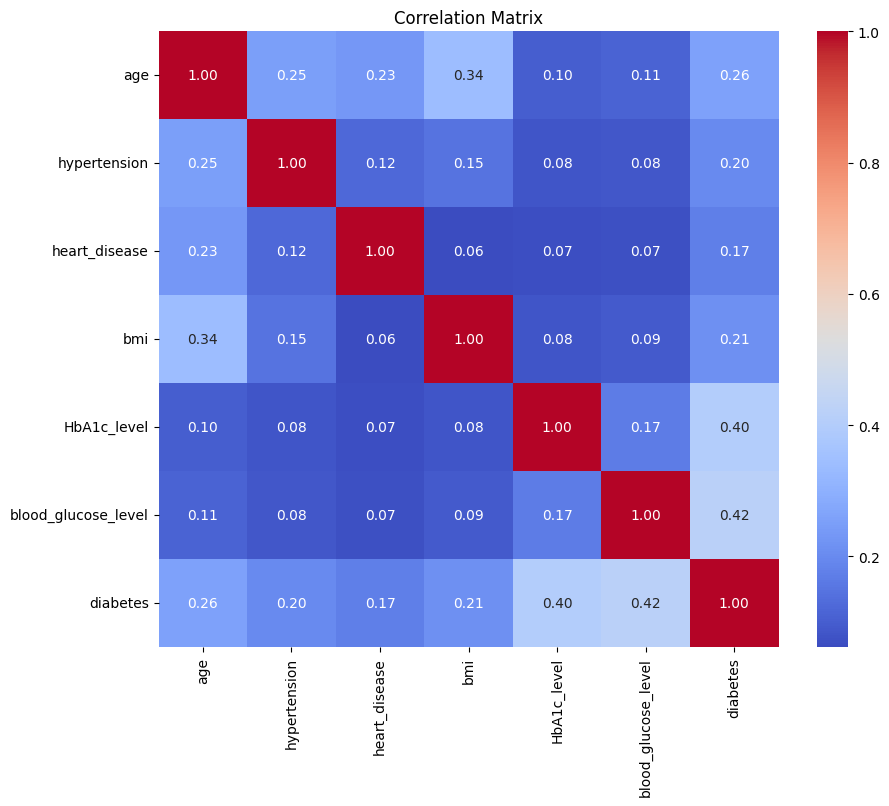

In [5]:

# Display the first few rows of the dataset
print(data.head())

# Check basic statistics of numerical features
print(data.describe())

# Check data types and missing values
print(data.info())

# Check the distribution of the target variable 'Outcome' (0 for no diabetes, 1 for diabetes)
sns.countplot(data['diabetes'])
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

# Explore feature distributions (e.g., age, BMI, HbA1c level, blood glucose level)
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(data['age'], bins=20, kde=True)
plt.title('Age Distribution')

plt.subplot(2, 2, 2)
sns.histplot(data['bmi'], bins=20, kde=True)
plt.title('BMI Distribution')

plt.subplot(2, 2, 3)
sns.histplot(data['HbA1c_level'], bins=20, kde=True)
plt.title('HbA1c Distribution')

plt.subplot(2, 2, 4)
sns.histplot(data['blood_glucose_level'], bins=20, kde=True)
plt.title('Blood Glucose Distribution')

plt.tight_layout()
plt.show()

# Explore correlations between features
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


 **Data Preprocessing:

Handle missing data by either imputing missing values or removing rows/columns with a significant amount of missing data.
Normalize or standardize numerical features like age, BMI, HbA1c level, and blood glucose level to ensure they have similar scales.
Encode categorical features like gender, hypertension, heart disease, and smoking history**

The dataset contains medical and demographic data from patients, along with their diabetes status (positive or negative).
The dataset has been loaded successfully.
There are a total of 100000 rows and 9 columns in the dataset.

In [6]:
#cheking for missing values in dataset
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
#cheking column datatypes
data.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

Data Types and Missing Values:

All columns have appropriate data types (e.g., integers, floats).
There are no missing values in any of the columns.

In [8]:
# 1. Handle Missing Data
# Replace missing values in numerical columns with the mean value
numerical_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())


In [9]:
from sklearn.preprocessing import StandardScaler

#2. Initialize the StandardScaler
scaler = StandardScaler()

# Apply the StandardScaler to normalize your numerical features
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [10]:
#3. Encode Categorical Features
# Encode binary categorical features (e.g., gender, hypertension, heart disease, smoking history)
binary_encoder = LabelEncoder()
binary_categorical_cols = ['gender', 'hypertension', 'heart_disease', 'smoking_history']
data[binary_categorical_cols] = data[binary_categorical_cols].apply(binary_encoder.fit_transform)

In [11]:
# Check the preprocessed dataset
print(data.head())

   gender       age  hypertension  heart_disease  smoking_history       bmi  \
0       0  1.692704             0              1                4 -0.321056   
1       0  0.538006             0              0                0 -0.000116   
2       1 -0.616691             0              0                4 -0.000116   
3       0 -0.261399             0              0                1 -0.583232   
4       1  1.515058             1              1                1 -1.081970   

   HbA1c_level  blood_glucose_level  diabetes  
0     1.001706             0.047704         0  
1     1.001706            -1.426210         0  
2     0.161108             0.489878         0  
3    -0.492690             0.416183         0  
4    -0.679490             0.416183         0  


now  we have a preprocessed dataset with missing values handled, numerical features normalized,
 and categorical features encoded for machine learning.

**Feature Engineering**




In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder


# Feature Engineering

#  BMI Category
# Calculate BMI category based on BMI value
def categorize_bmi(Bmi):
    if Bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= Bmi < 24.9:
        return 'Normal Weight'
    elif 24.9 <= Bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obese'

data['BMICategory'] = data['bmi'].apply(categorize_bmi)

#  Feature Transformations (Log Transformation)
# Log transform skewed variables (e.g., HbA1c and BloodGlucose)
data['LogHbA1c'] = np.log1p(data['HbA1c_level'])
data['LogBloodGlucose'] = np.log1p(data['blood_glucose_level'])

# Check the dataset with feature engineering applied
print(data.head())


   gender       age  hypertension  heart_disease  smoking_history       bmi  \
0       0  1.692704             0              1                4 -0.321056   
1       0  0.538006             0              0                0 -0.000116   
2       1 -0.616691             0              0                4 -0.000116   
3       0 -0.261399             0              0                1 -0.583232   
4       1  1.515058             1              1                1 -1.081970   

   HbA1c_level  blood_glucose_level  diabetes  BMICategory  LogHbA1c  \
0     1.001706             0.047704         0  Underweight  0.694000   
1     1.001706            -1.426210         0  Underweight  0.694000   
2     0.161108             0.489878         0  Underweight  0.149375   
3    -0.492690             0.416183         0  Underweight -0.678633   
4    -0.679490             0.416183         0  Underweight -1.137841   

   LogBloodGlucose  
0         0.046601  
1              NaN  
2         0.398695  
3       

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [13]:
# For non-binary categorical features, use one-hot encoding
data = pd.get_dummies(data, columns=['BMICategory'])

**BMI Category:

We create a new feature 'BMICategory' by categorizing BMI values into categories (Underweight, Normal Weight, Overweight, Obese).
Feature Transformations (Log Transformation):

We perform a log transformation on skewed numerical features (HbA1c and BloodGlucose) to reduce their skewness.**

splitting dataset for trining and testing


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Define the features (X) and target variable (y)
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Split the dataset into training, validation, and test sets
# 70% for training, 15% for validation, and 15% for testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Check the sizes of the splits
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Validation set size: {X_valid.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')


Training set size: 70000 samples
Validation set size: 15000 samples
Test set size: 15000 samples


In [15]:
from sklearn.impute import SimpleImputer

# Create an imputer with a chosen strategy (e.g., mean)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on your dataset
X_train = imputer.fit_transform(X_train)
X_valid = imputer.transform(X_valid)


In [16]:
from sklearn.impute import SimpleImputer

# Create an imputer with a chosen strategy (e.g., mean)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on your dataset
X_test = imputer.fit_transform(X_test)


In [17]:
import numpy as np
from sklearn.impute import SimpleImputer

# Create an imputer with a chosen strategy (e.g., mean)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on your NumPy array (X_test)
X_test = imputer.fit_transform(X_test)


In [18]:
import numpy as np

# Identify rows with any missing values (NaN)
rows_with_missing_values = np.isnan(X_test).any(axis=1)

# Filter X_test to exclude rows with missing values
X_test = X_test[~rows_with_missing_values]


model selection


In [19]:
#logisticregression
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [20]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set using the best model
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
classification_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report)


Accuracy: 0.9592666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     13715
           1       0.87      0.61      0.72      1285

    accuracy                           0.96     15000
   macro avg       0.92      0.80      0.85     15000
weighted avg       0.96      0.96      0.96     15000



In [21]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier model
model = RandomForestClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)




RandomForestClassifier(random_state=42)

In [22]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set using the best model
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
classification_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report)


Accuracy: 0.9700666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     13715
           1       0.95      0.69      0.80      1285

    accuracy                           0.97     15000
   macro avg       0.96      0.84      0.89     15000
weighted avg       0.97      0.97      0.97     15000



In [23]:
#Gradient boosting
import xgboost as xgb

# Create an XGBoost Classifier model
model = xgb.XGBClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [24]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set using the best model
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
classification_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report)


Accuracy: 0.9715333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     13715
           1       0.97      0.69      0.81      1285

    accuracy                           0.97     15000
   macro avg       0.97      0.84      0.89     15000
weighted avg       0.97      0.97      0.97     15000



In [25]:
#svm
from sklearn.svm import SVC

# Create an SVM Classifier model
model = SVC(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)



SVC(random_state=42)

In [26]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set using the best model
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
classification_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report)


Accuracy: 0.9620666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     13715
           1       1.00      0.56      0.72      1285

    accuracy                           0.96     15000
   macro avg       0.98      0.78      0.85     15000
weighted avg       0.96      0.96      0.96     15000



Hyperparameter tuning


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Create a RandomForestClassifier model
model = RandomForestClassifier(random_state=42)

# Define hyperparameters and their distributions
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 5)
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)

# Train the model with randomized search on a subset of training data
random_search.fit(X_train[:1000], y_train[:1000])

# Get the best-performing model with optimized hyperparameters
best_model = random_search.best_estimator_

# Evaluate the best model on the validation set
validation_accuracy = best_model.score(X_valid, y_valid)

# Print the best hyperparameters and validation accuracy
print(f'Best Hyperparameters: {random_search.best_params_}')
print(f'Validation Accuracy: {validation_accuracy:.2f}')


Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_depth': 30}
Validation Accuracy: 0.97


model evalution

Accuracy: 0.97
Precision: 1.00
Recall: 0.67
F1-Score: 0.80
ROC-AUC: 0.96


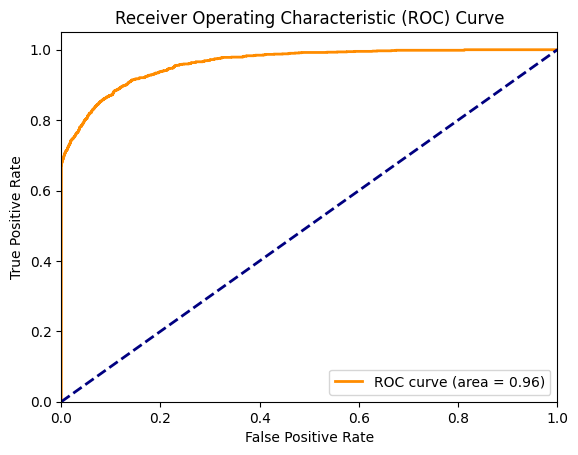

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     13715
           1       1.00      0.67      0.80      1285

    accuracy                           0.97     15000
   macro avg       0.98      0.83      0.89     15000
weighted avg       0.97      0.97      0.97     15000



In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Predict on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate ROC-AUC score
y_prob = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print the classification report
print("Classification Report:\n", classification_rep)


In [29]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Define a list of classifiers to compare
classifiers = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Support Vector Machine', SVC(probability=True, random_state=42)),
    ('Gradient boosting', XGBClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42))
]

# Iterate through the classifiers and print evaluation metrics
for clf_name, clf in classifiers:
    # Perform cross-validation (adjust cv parameter as needed)
    scores = cross_val_score(clf, X_train, y_train, cv=2, scoring='accuracy')

    # Fit the model on the full training data
    clf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calculate ROC-AUC if applicable (not all classifiers provide probabilities)
    if hasattr(clf, 'predict_proba'):
        y_prob = clf.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
    else:
        roc_auc = None

    # Print evaluation metrics
    print(f'Classifier: {clf_name}')
    print(f'Cross-Validation Accuracy: {scores.mean():.2f}')
    print(f'Test Accuracy: {accuracy:.2f}')
    print(f'Test Precision: {precision:.2f}')
    print(f'Test Recall: {recall:.2f}')
    print(f'Test F1-Score: {f1:.2f}')
    if roc_auc is not None:
        print(f'Test ROC-AUC: {roc_auc:.2f}')
    print('-' * 40)


Classifier: Random Forest
Cross-Validation Accuracy: 0.97
Test Accuracy: 0.97
Test Precision: 0.95
Test Recall: 0.69
Test F1-Score: 0.80
Test ROC-AUC: 0.97
----------------------------------------
Classifier: Support Vector Machine
Cross-Validation Accuracy: 0.96
Test Accuracy: 0.96
Test Precision: 1.00
Test Recall: 0.56
Test F1-Score: 0.72
Test ROC-AUC: 0.91
----------------------------------------
Classifier: Gradient boosting
Cross-Validation Accuracy: 0.97
Test Accuracy: 0.97
Test Precision: 0.97
Test Recall: 0.69
Test F1-Score: 0.81
Test ROC-AUC: 0.98
----------------------------------------
Classifier: Logistic Regression
Cross-Validation Accuracy: 0.96
Test Accuracy: 0.96
Test Precision: 0.87
Test Recall: 0.61
Test F1-Score: 0.72
Test ROC-AUC: 0.96
----------------------------------------


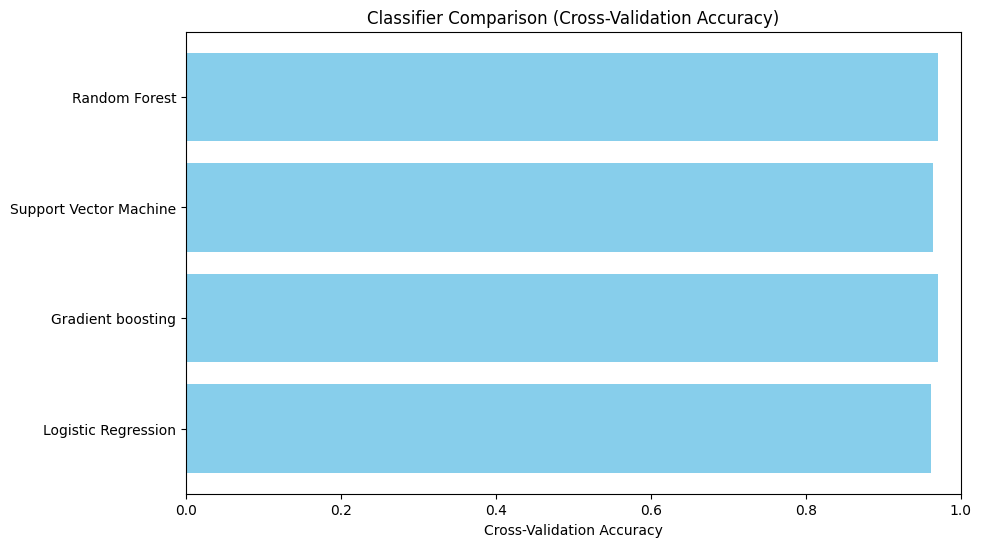

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier




# Define a list of classifiers to compare
classifiers = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Support Vector Machine', SVC(probability=True, random_state=42)),
    ('Gradient boosting', XGBClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42))
]

# Initialize lists to store model names and their cross-validation accuracies
model_names = []
cv_accuracies = []

# Iterate through the classifiers and compute cross-validation accuracies
for clf_name, clf in classifiers:
    # Perform cross-validation (adjust cv parameter as needed)
    scores = cross_val_score(clf, X_train, y_train, cv=2, scoring='accuracy')
    model_names.append(clf_name)
    cv_accuracies.append(scores.mean())

# Create a bar chart to compare model accuracies
plt.figure(figsize=(10, 6))
plt.barh(model_names, cv_accuracies, color='skyblue')
plt.xlabel('Cross-Validation Accuracy')
plt.title('Classifier Comparison (Cross-Validation Accuracy)')
plt.xlim(0, 1.0)
plt.gca().invert_yaxis()  # Reverse the order for better readability
plt.show()


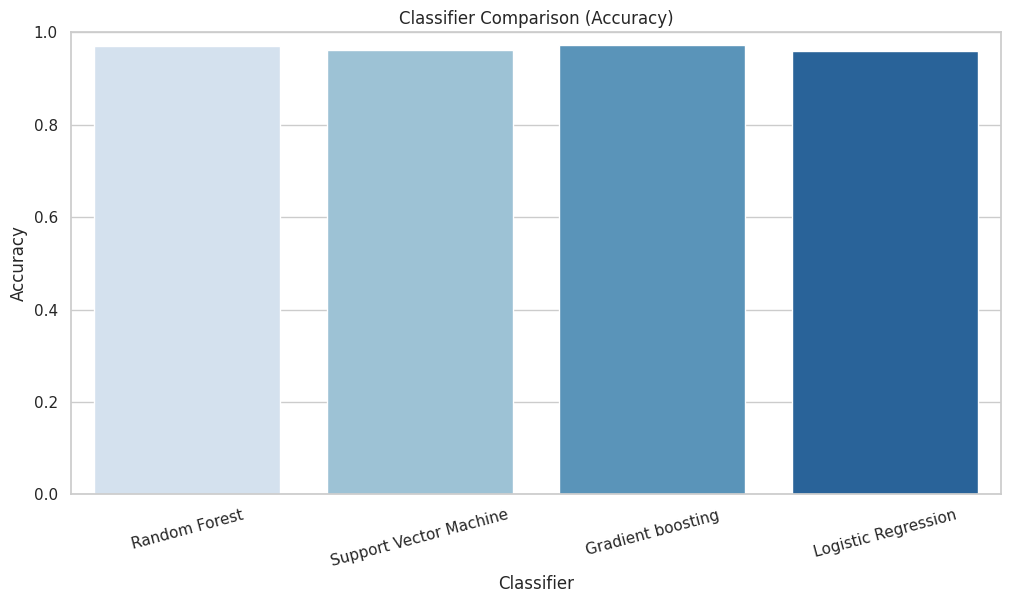

In [33]:

# Define a list of classifiers to compare
classifiers = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Support Vector Machine', SVC(probability=True, random_state=42)),
    ('Gradient boosting', XGBClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42))
]

# Initialize a dictionary to store evaluation metrics
metrics_dict = {
    'Classifier': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

# Iterate through the classifiers and compute evaluation metrics
for clf_name, clf in classifiers:
    # Perform cross-validation (adjust cv parameter as needed)
    scores = cross_val_score(clf, X_train, y_train, cv=2, scoring='accuracy')

    # Fit the model on the full training data
    clf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store metrics in the dictionary
    metrics_dict['Classifier'].append(clf_name)
    metrics_dict['Accuracy'].append(accuracy)
    metrics_dict['Precision'].append(precision)
    metrics_dict['Recall'].append(recall)
    metrics_dict['F1-Score'].append(f1)

# Create a DataFrame from the metrics dictionary
metrics_df = pd.DataFrame(metrics_dict)

# Plot the evaluation metrics using seaborn and matplotlib
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
ax = sns.barplot(data=metrics_df, x='Classifier', y='Accuracy', palette='Blues')
plt.title('Classifier Comparison (Accuracy)')
plt.ylim(0, 1.0)  # Set the y-axis limit to the range of accuracy (0 to 1)
plt.xticks(rotation=15)  # Rotate x-axis labels for better readability
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.show()
